## All profiles using P21 probe

Use calibration August 17

In [1]:
import cmocean as cmo
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools


In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [11]:
# Dictionaries:

T08 = {"date": "15Aug19",
       "Nsb": 1.88 ,
       "Nshelf": 1.88,
       "fo": 0.8 ,
       "U":0.5 ,
       "run_num": 3,
       "dir": '../experiments/exp_15aug19/',
       "run_files":['03_profile1.mat', '07_profile2.mat', '11_profile3.mat'],
       "color":'brown',
       "rho_top":[1.01799,1.02028,np.nan],
       "rho_sb":[1.02975,1.02919,np.nan],
       "rho_bot":[1.04902,1.04798,np.nan],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }
T09 = {"date": "17Aug19",
       "Nsb": 1.55 ,
       "Nshelf": 1.55,
       "fo": 0.5 ,
       "U":0.25 ,
       "run_num": 3,
       "dir": '../experiments/exp_17aug19/',
       "run_files":['04_profile1.mat','08_profile2.mat','11_profile3.mat'],
       "color":'gray',
       "rho_top":[1.01560,1.01730,1.01782],
       "rho_sb":[1.02407,1.02391,1.02408],
       "rho_bot":[1.04209,1.04105,1.04083],
       "hsb":2.9,
       "hbot":9.5,
       "calibration":'17Aug19',
       }
T10 = {"date": "18Aug19",
       "Nsb": 1.9 ,
       "Nshelf": 1.9,
       "fo": 0.7 ,
       "U":0.375 ,
       "run_num": 1,
       "dir": '../experiments/exp_18aug19/',
       "run_files":['03_profile1.mat'],
       "color":'cornflowerblue',
       "rho_top":[1.01502],
       "rho_sb":[1.02586],
       "rho_bot":[1.04188],
       "hsb":2.95,
       "hbot":9.6,
       "calibration":'17Aug19',
       }
T11 = {"date": "18Aug19",
       "Nsb": 1.65 ,
       "Nshelf": 1.65,
       "fo": 0.7 ,
       "U":0.5 ,
       "run_num": 1,
       "dir": '../experiments/exp_18aug19/',
       "run_files":['06_profile2.mat'],
       "color":'slategrey',
       "rho_top":[1.01728],
       "rho_sb":[1.02490],
       "rho_bot":[1.04160],
       "hsb":2.95,
       "hbot":9.6,
       "calibration":'17Aug19',
       }
T12 = {"date": "18Aug19",
       "Nsb": 1.65 ,
       "Nshelf": 1.65,
       "fo": 0.7 ,
       "U":0.625 ,
       "run_num": 1,
       "dir": '../experiments/exp_18aug19/',
       "run_files":['10_profile3.mat'],
       "color":'navy',
       "rho_top":[1.01750],
       "rho_sb":[1.02514],
       "rho_bot":[1.04117],
       "hsb":2.95,
       "hbot":9.6,
       "calibration":'17Aug19',
       }

In [12]:
exp_dicts = [T08,T09,T10,T11,T12]
exp_num = len(exp_dicts) # number of experiment dictionaries

colors = ['teal','darkorange','yellowgreen', 'tan']

../experiments/exp_15aug19/03_profile1.mat
../experiments/exp_15aug19/07_profile2.mat
../experiments/exp_15aug19/11_profile3.mat
../experiments/exp_17aug19/04_profile1.mat
../experiments/exp_17aug19/08_profile2.mat
../experiments/exp_17aug19/11_profile3.mat
../experiments/exp_18aug19/03_profile1.mat
../experiments/exp_18aug19/06_profile2.mat
../experiments/exp_18aug19/10_profile3.mat


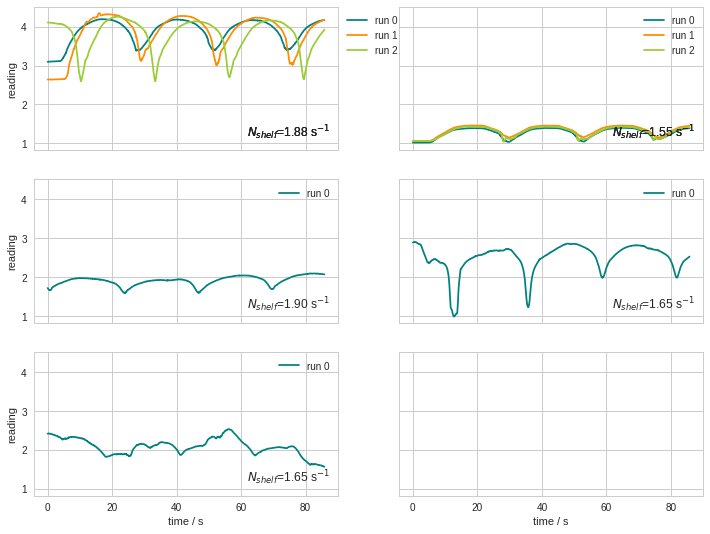

In [13]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(12,9), sharex=True, sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]

for exp, ax in zip(exp_dicts, axs):
    for ii, col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        print(filepath)
        mat = sio.loadmat(filepath, squeeze_me=True)
        P3 = mat['ch3']
        time = mat['time']
        ax.plot(time,P3,'-',color=col, label='run %d' %ii)
        ax.text(0.7,0.1,'$N_{shelf}$=%1.2f s$^{-1}$' %exp["Nshelf"], transform=ax.transAxes)
    ax.legend(bbox_to_anchor=(1,1))

ax6.set_xlabel('time / s')
ax5.set_xlabel('time / s')

for ax in [ax1,ax3,ax5]:
    ax.set_ylabel('reading')

Filtered readings

../experiments/exp_15aug19/03_profile1.mat
../experiments/exp_15aug19/07_profile2.mat
../experiments/exp_15aug19/11_profile3.mat
../experiments/exp_17aug19/04_profile1.mat
../experiments/exp_17aug19/08_profile2.mat
../experiments/exp_17aug19/11_profile3.mat
../experiments/exp_18aug19/03_profile1.mat
../experiments/exp_18aug19/06_profile2.mat
../experiments/exp_18aug19/10_profile3.mat


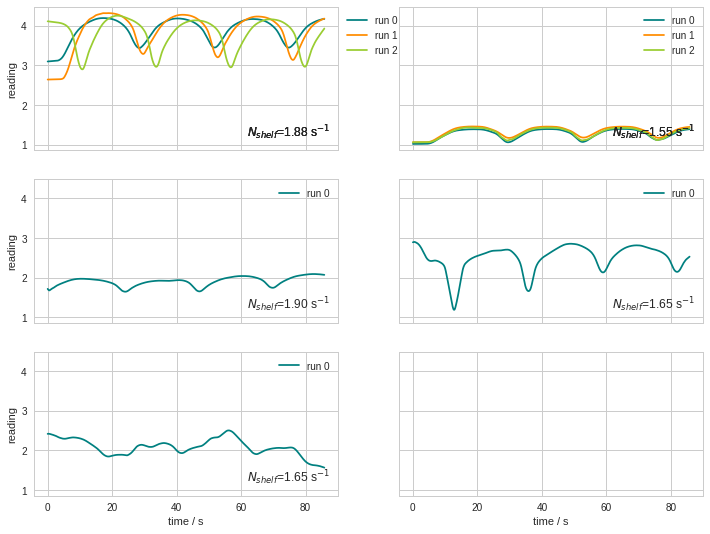

In [14]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(12,9), sharex=True, sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]

for exp, ax in zip(exp_dicts, axs):
    for ii, col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        print(filepath)
        mat = sio.loadmat(filepath, squeeze_me=True)
        P3_unfilt = mat['ch3']
        P3 = ctools.filter_timeseries(P3_unfilt,winlen=70)
        time = mat['time']
        ax.plot(time,P3,'-',color=col, label='run %d' %ii)
        ax.text(0.7,0.1,'$N_{shelf}$=%1.2f s$^{-1}$' %exp["Nshelf"], transform=ax.transAxes)
    ax.legend(bbox_to_anchor=(1,1))

ax6.set_xlabel('time / s')
ax5.set_xlabel('time / s')

for ax in [ax1,ax3,ax5]:
    ax.set_ylabel('reading')

../experiments/exp_15aug19/03_profile1.mat
../experiments/exp_15aug19/07_profile2.mat
../experiments/exp_15aug19/11_profile3.mat
../experiments/exp_17aug19/04_profile1.mat
../experiments/exp_17aug19/08_profile2.mat
../experiments/exp_17aug19/11_profile3.mat
../experiments/exp_18aug19/03_profile1.mat
../experiments/exp_18aug19/06_profile2.mat
../experiments/exp_18aug19/10_profile3.mat


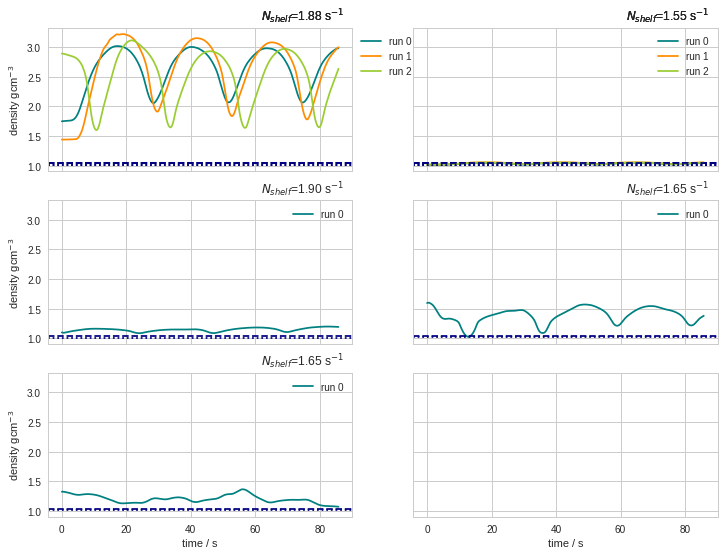

In [15]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(12,9), sharex=True, sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6]

for exp, ax in zip(exp_dicts, axs):
    for ii, col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        print(filepath)
        mat = sio.loadmat(filepath, squeeze_me=True)
        P3_unfilt = mat['ch3']
        P3 = ctools.filter_timeseries(P3_unfilt,winlen=70)
        dens = ctools.densP_17Aug19(P3)
        time = mat['time']
        ax.plot(time,dens,'-',color=col, label='run %d' %ii)
        ax.text(0.7,1.05,'$N_{shelf}$=%1.2f s$^{-1}$' %exp["Nshelf"], transform=ax.transAxes)
        ax.axhline(exp["rho_top"][ii],color='navy', linestyle=':')
        ax.axhline(exp["rho_bot"][ii], color='navy', linestyle='--')
    ax.legend(bbox_to_anchor=(1,1))

ax6.set_xlabel('time / s')
ax5.set_xlabel('time / s')

for ax in [ax1,ax3,ax5]:
    ax.set_ylabel('density gcm$^{-3}$')

When I calibrated this probe readings were never above 1.5 or so, and when I actually used it readings are all over the place :(